# Dealing with Missing Data

This notebook will review ways to deal with missing data in a pandas dataframe. 

See the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) for more information. 

In [29]:
# import packages
import pandas as pd

In [30]:
# read in data
df = pd.read_csv('../Data/anime.csv')

In [31]:
# Check shape of data
## Should be 6668 rows and 33 columns
df.shape

(6668, 33)

In [32]:
# Summarize info with df.info()
# Notice the count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6668 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

# Check Missing Data

In [43]:
# pd.isna() will return True if a NaN value is found and False otherwise
pd.isna(df)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,rank_filled,rank_filled_0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,False,False,True,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
6664,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
6665,False,False,True,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
6666,False,False,False,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [44]:
# You can call a sum on is na to get a total count of missing values for a df or column
pd.isna(df['rank']).sum()

356

In [45]:
# You can call a sum on is na to get a total count of missing values for a df or column
pd.isna(df).sum()

anime_id              0
title                 0
title_english      3230
title_japanese        5
title_synonyms     2187
image_url             2
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank                356
popularity            0
members               0
favorites             0
background         5855
premiered          3702
broadcast          3688
related               0
producer           2266
licensor           3881
studio                0
genre                 4
opening_theme         0
ending_theme          0
duration_min          0
aired_from_year       0
rank_filled           0
rank_filled_0         0
dtype: int64

## Plot missing values

<AxesSubplot:>

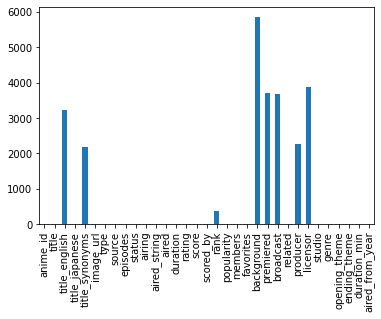

In [33]:
# Get a count of null values and plot the sum
df.isnull().sum().plot(kind='bar')

## Drop all rows with a NaN value

In [34]:
# Drop NaNs and return new dataframe
df2 = df.dropna()

In [35]:
# Check how much data was lost
## Notice, we're down to 282 rows-that is a LOT of dropped data
df2.shape

(282, 33)

## Drop all Columns with Missing values

In [36]:
# Drop cols with NaNs and return new df
df3 = df.dropna(axis=1)

In [37]:
# Check how much data was lost
## Notice, we dropped cols this time and still have the original number of rows
df3.shape

(6668, 22)

## Fill NaNs with a value

In [38]:
# Lets focus on df['rank'] and replace the NaN values in that col
df['rank'].describe()

count     6312.000000
mean      4327.645120
std       3170.699074
min          1.000000
25%       1710.750000
50%       3754.500000
75%       6338.500000
max      12856.000000
Name: rank, dtype: float64

In [39]:
# Create a new column with NaNs filled by mean value
df['rank_filled'] = df['rank'].fillna(df['rank'].mean())

In [40]:
# Check new column-notice count has changed from above
df['rank_filled'].describe()

count     6668.000000
mean      4327.645120
std       3084.884357
min          1.000000
25%       1825.750000
50%       4000.000000
75%       6184.500000
max      12856.000000
Name: rank_filled, dtype: float64

In [41]:
# Create a new column with NaNs filled with a 0
df['rank_filled_0'] = df['rank'].fillna(0)

In [42]:
# Check new column-notice count has changed from above
df['rank_filled_0'].describe()

count     6668.000000
mean      4096.595081
std       3234.682662
min          0.000000
25%       1401.500000
50%       3504.500000
75%       6184.500000
max      12856.000000
Name: rank_filled_0, dtype: float64

# Final Tips and Tricks

Remember, when cleaning missing data, you usually want to retain as much info/data as possible.

For continous values, it may make sense to fill NaNs with a mean value.

For categorial values, you can consider filling NaNs with the most common category. 